# 🧠 Customer Churn Prediction using ML

This project uses the **Bank Customer Churn Prediction** dataset from Kaggle to predict customer churn using three machine learning models:
- Logistic Regression
- Random Forest
- Gradient Boosting

We also visualize the performance using confusion matrices and explore feature importance.


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Step 2: Upload Dataset
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving Churn_Modelling.csv to Churn_Modelling.csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Step 3: Preprocess Data
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical features
categoricals = ['Geography', 'Gender']
for col in categoricals:
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert target to int
df['Exited'] = df['Exited'].astype(int)

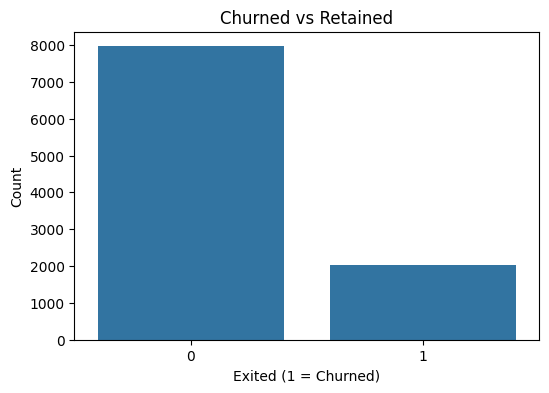

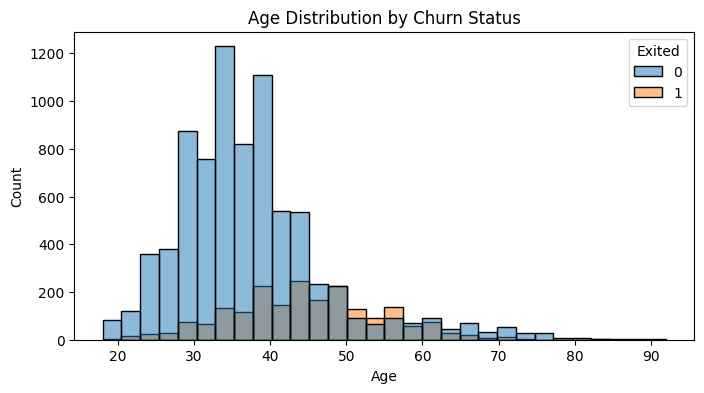

In [4]:
# Step 4: Visualize Data
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Churned vs Retained')
plt.xlabel('Exited (1 = Churned)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age', hue='Exited', bins=30)
plt.title('Age Distribution by Churn Status')
plt.show()

In [5]:
# Step 5: Train-Test Split
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.19      0.29       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.79      0.82      0.78      2000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


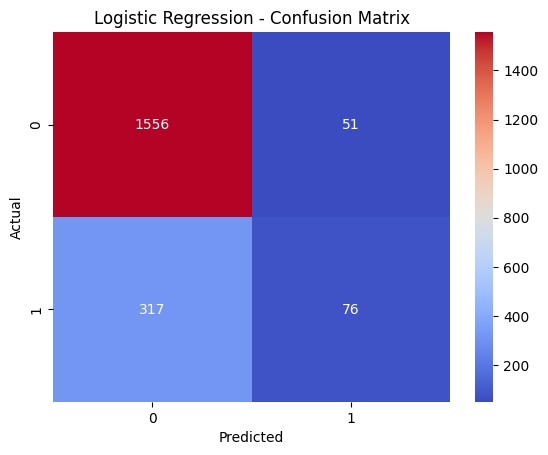


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



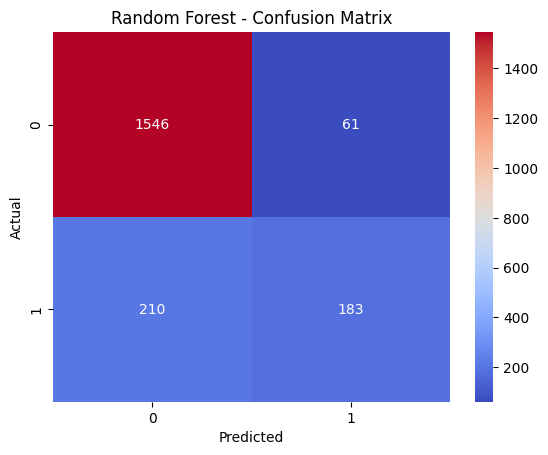


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



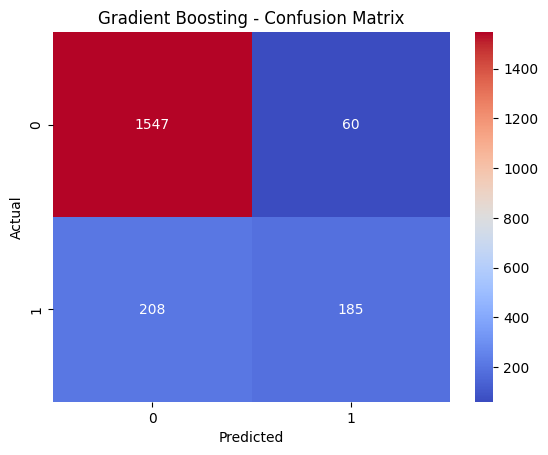

In [6]:
# Step 6: Train Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

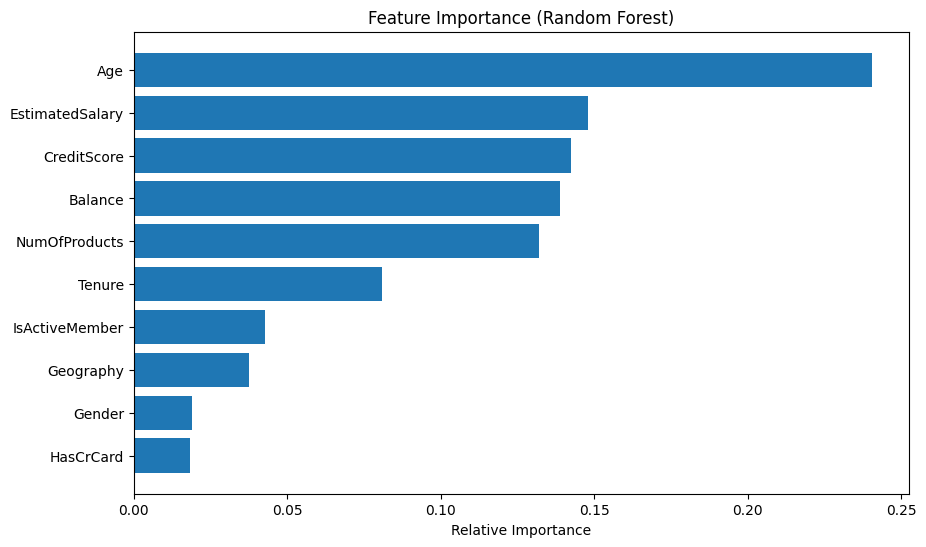

In [7]:
# Step 7: Feature Importance (Random Forest)
importances = models['Random Forest'].feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Relative Importance')
plt.show()